In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 


Data set is obtained from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710002001 via ProductID 17-10-0020-01. 

This notebook uses our quick data set exploration application, and plots pie charts specific to the data set. 

NOTE: The last section will not work with other data sets, however the code can be modified to reflect the correct field names for other data sets. 

In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py
%run -i climate_func.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import qgrid as q
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep
import sys

grid_features = { 'fullWidthRows': True,
                  'syncColumnCellResize': True,
                  'forceFitColumns': True,
                  'enableColumnReorder': True,
                  'enableTextSelectionOnCells': True,
                  'editable': False,
                  'filterable': True,
                  'sortable': False,
                  'highlightSelectedRow': True}

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}



<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="17-10-0020-01",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( run_4cell )
display(prod_ID)
display(DS_button)

Text(value='17-10-0020-01', description='productID value', placeholder='ProductID value', style=DescriptionSty…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# # Download data 
productId = prod_ID.value

if "-" not in productId:
    if len(productId)!=10:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        

else: 
    if len(productId.split("-")) !=4:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        
download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df



df_fullDATA = zip_table_to_dataframe(productId)




cols = list(df_fullDATA.loc[:,'REF_DATE':'UOM'])+ ['SCALAR_FACTOR'] +  ['VALUE']
df_less = df_fullDATA[cols]
df_less2 = df_less.drop(["DGUID"], axis=1)
df_less2.head()


PARSING DATA AS PANDAS DATAFRAME


,REF_DATE,GEO,Interprovincial migration,UOM,SCALAR_FACTOR,VALUE
0,1961-07-01,Canada,In-migrants,Persons,units,95570.0
1,1961-07-01,Canada,Out-migrants,Persons,units,95570.0
2,1961-07-01,Newfoundland and Labrador,In-migrants,Persons,units,2189.0
3,1961-07-01,Newfoundland and Labrador,Out-migrants,Persons,units,2160.0
4,1961-07-01,Prince Edward Island,In-migrants,Persons,units,1558.0


In [75]:
iteration_nr = df_less2.shape[1]
categories = []
for i in range(iteration_nr-1):
    categories.append(df_less2.iloc[:,i].unique())
    
    
all_the_widgets = []
for i in range(len(categories)):
    if i==0:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Start Date:', 
                style = style, 
                disabled=False
            )
        b_category = widgets.Dropdown(
                value = categories[i][-1],
                options = categories[i], 
                description ='End Date:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        all_the_widgets.append(b_category)
    elif i==1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Location:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    elif i==len(categories)-1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Scalar factor:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        
    elif i==len(categories)-2:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Units of Measure :', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    else:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Subcategory ' + str(i), 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)


## <h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [76]:
CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )

tab3 = VBox(children=[HBox(children=all_the_widgets[0:3]),
                      HBox(children=all_the_widgets[3:5]),
                      HBox(children=all_the_widgets[5:len(all_the_widgets)]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
df_sub = df_less2[(df_less2["REF_DATE"]>=all_the_widgets[0].value) & 
                  (df_less2["REF_DATE"]<=all_the_widgets[1].value) &
                  (df_less2["GEO"]==all_the_widgets[2].value) &
                  (df_less2["UOM"]==all_the_widgets[-2].value) & 
                  (df_less2["SCALAR_FACTOR"]==all_the_widgets[-1].value) ]




In [102]:
# TO HANDLE THE REST OF THE COLUMNS, SIMPLY SUBSTITUTE VALUES 
col_name = df_sub.columns[2]

# weather_data = pd.read_csv("DATA.csv",sep=',')
col_name

df_sub_final = df_sub[(df_sub[col_name]==all_the_widgets[3].value)]

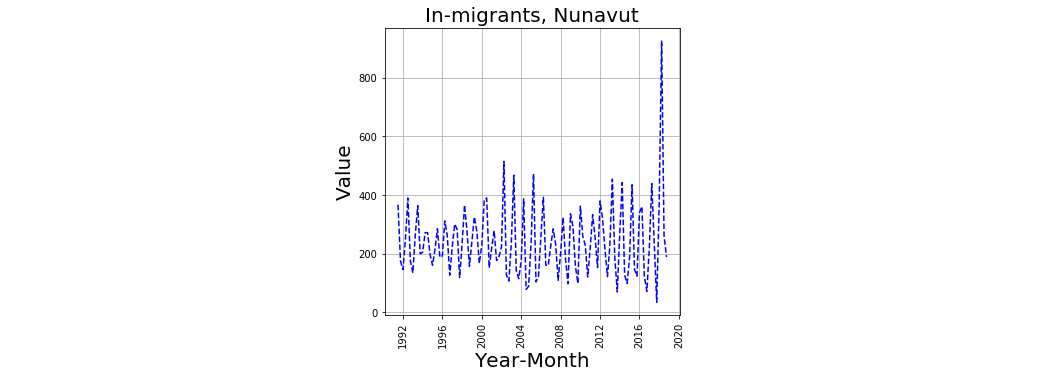

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(facecolor='w',figsize=(18,18))
plt.subplot(3, 3, 1)
plt.axis('off');
# weather_data['Temp (°C)'] = weather_data['Temp (°C)'].interpolate()
# sns.set_style('whitegrid')

# if geoLoc=="Yukon":
    
#     weather_data = all_the_weather_data_YUKON[0]
#     title = "White Horse"
# elif geoLoc=="Northwest Territories":
#     weather_data = all_the_weather_data_YUKON[1]
#     title = "Yellowknife"
# elif geoLoc=="Nunavut":
#     weather_data = all_the_weather_data_YUKON[2]
#     title = "Rankin Inlet"

# plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'])
# plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'].rolling(window=250,center=False).mean(), '-k', alpha=1.0)
# plt.title("Temperature in " + title ,fontsize=25)
# plt.ylabel('Temp (°C)')
# plt.xlabel('Time')

plt.subplot(3, 3, 2)
plt.plot(df_sub_final["REF_DATE"],df_sub_final["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year-Month', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(str(all_the_widgets[3].value) + ", "+  str(all_the_widgets[2].value),fontsize=20)
plt.xticks(rotation=90)
plt.grid(True)


plt.subplot(3, 3, 3);
plt.axis('off');


In [104]:
geo_dp2 = widgets.Dropdown(
    options = categories[1], 
    description ='Select location:', 
    style = style, 
    disabled=False
)

# options = ["Pie Chart","Bar Chart"]

# option = widgets.Dropdown(
#     options = options, 
#     description ='Select location:', 
#     style = style, 
#     disabled=False
# )

CD_button2 = widgets.Button(
    button_style='success',
    description="Preview Chart", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button2.on_click( rerun_cell )


tab3 = VBox(children=[HBox(children=[geo_dp2]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Preview Chart')
display(tab)

In [98]:
def get_year_pd(dataframe,year):
    # THIS IS GENERIC
    df_year = dataframe.loc[(dataframe["REF_DATE"] == str(year))]
    df4 = df_year.rename(index=str, columns={"VALUE": year,"GEO":"Geography"})
    df4 = df4.drop(columns="REF_DATE")

    return df4

df_2010_f = get_year_pd(df_less2,"1990-01-01")
df_2010_s = get_year_pd(df_less2,"1990-04-01")
df_2010_t = get_year_pd(df_less2,"1990-07-01")
df_2010_fo = get_year_pd(df_less2,"1990-10-01")

df_2018_f = get_year_pd(df_less2,"2018-01-01")
df_2018_s = get_year_pd(df_less2,"2018-04-01")
df_2018_t = get_year_pd(df_less2,"2018-07-01")
df_2018_fo = get_year_pd(df_less2,"2018-10-01")
new_df10 = pd.merge(pd.merge(pd.merge(df_2010_f,df_2010_s),df_2010_t),df_2010_fo)
new_df18 = pd.merge(pd.merge(pd.merge(df_2018_f,df_2018_s),df_2018_t),df_2018_fo)
new_df = pd.merge(new_df10,new_df18)

df3 = new_df.iloc[2:,:]
df4 = df3[df3["Interprovincial migration"]=="In-migrants"]
df5 = df3[df3["Interprovincial migration"]=="Out-migrants"]

In [99]:
whichprovince = geo_dp2.value

whichPo = new_df.loc[new_df['Geography']== whichprovince]

whichPo

,Geography,Interprovincial migration,UOM,SCALAR_FACTOR,1990-01-01,1990-04-01,1990-07-01,1990-10-01,2018-01-01,2018-04-01,2018-07-01,2018-10-01


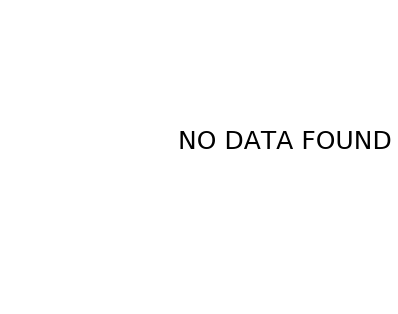

In [100]:
plt.rcParams.update({'font.size': 15})

if whichPo.size==0:
    fig = plt.figure(figsize=(5,5))

    plt.text(0.5,0.5,"NO DATA FOUND",fontsize=25)
    
    plt.axis("Off")
    
else:
    temp1 = whichPo['1990-01-01']
    temp2 = whichPo['1990-04-01']
    temp3 = whichPo['1990-07-01']
    temp4 = whichPo['1990-10-01']

    temp11 = whichPo['2018-01-01']
    temp21 = whichPo['2018-04-01']
    temp31 = whichPo['2018-07-01']
    temp41 = whichPo['2018-10-01']

    fig = plt.figure(figsize=(20,12))

    ax1 = fig.add_subplot(241)
    temp1.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%2.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])
    plt.title("In-migrants and Out-migrants: 2018",fontsize=25)
    


    ax2 = fig.add_subplot(242)
    temp2.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax3 = fig.add_subplot(243)
    temp3.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax4 = fig.add_subplot(244)
    temp4.plot(kind = 'pie', subplots=True,
                legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax5 = fig.add_subplot(245)
    plt.title("In-migrants and Out-migrants: 1990",fontsize=25)

    temp11.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax6 = fig.add_subplot(246)
    temp21.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax7 = fig.add_subplot(247)
    temp31.plot(kind = 'pie', subplots=True,
               legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    ax8 = fig.add_subplot(248)
    temp41.plot(kind = 'pie', subplots=True,
                legend=False, autopct='%1.1f%%', radius=1,labels=whichPo['Interprovincial migration'],colors = ['red', 'pink'])

    plt.show()

<h2 align='center'>References</h2>

Statistics Canada.  Table  17-10-0059-01   Estimates of the components of natural increase, quarterly


# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)